Victor Pugliese Github link:https://github.com/VictorPuglieseManotas e-mail: victor.pugliese@ttu.edu

Acknowledge: The following work has been performed under the supervision of Dr. Ekarit Panacharoensawad, Assistant Professor, Department of Petroleum Engineering, Texas Tech University. Github link: https://github.com/epmmko e-mail: ekarit.panacharoensawad@ttu.edu

The following work has been performed with the collaboration of Dr. Raymond Eghorieta. e-mail: raymond.eghorieta@ttu.edu

# Drift Velocity Analysis

## 1. Introduction

Dimensionles gruoups have been applied by many researchers to estimate the rise velocity of a single bubble moving in liquid in pipe under the influence of gravitational, inertial, viscous and interfacial forces. These are: Reynolds Number, Eotvos number, Viscosyty Number, Bouyancy Reynolds Number and Froud Number.
The objetive of this analysis is to find a model to relate the Froud Number with the rest of dimensionless group. Then, we could use Davies and Taylor (1950) clousure relationship to calculate the drift velocity.

In [1]:
#Libraries used
%matplotlib inline                 
import os                          
import numpy as np                 
import pandas as pd                
import matplotlib.pyplot as plt    
import time
import warnings
warnings.filterwarnings('ignore')  #Never print matching warnings

## 2. Data Preparation
### 2.1. Load Data
The information is taken from the excel file in VictorPuglieseManotas's repository named Research. In this way, any person could download the raw data: https://github.com/VictorPuglieseManotas/Research/blob/master/Drift_Velocity_Analysis.xlsx

In [2]:
Experimental_Data=pd.read_excel(r"C:\Users\victo\Train_Set_Drift_Velocity_Analysis.xlsx")
Experimental_Data=Experimental_Data.iloc[np.random.permutation(len(Experimental_Data))]
Experimental_Data.head()                                                                  

,Inclination [°],Cos(Angle),Sin(Angle),Temperature [C],\rhoL [kg/m3],\rhoG [kg/m3],\muL [Pa.s],\sigma [N/m],Liquid Type,Diameter [m],Drift Velocity [m/s],Reynolds Number Re,Buoyancy Reynolds R,Eotvos Number Eo,Viscosity Number Nmu,Froud Number Fr
107,60.0,0.500000,0.866025,10.600000,895.000000,1.244631,1.28700,0.0295,Oil,0.0508,0.17400,0.008548,24.917141,766.734045,0.040161,0.246694
57,60.0,0.500000,0.866025,40.000000,876.000000,1.127723,0.18500,0.0295,Oil,0.0508,0.30400,0.094139,169.671367,750.534635,0.005898,0.430984
4,0.0,1.000000,0.000000,45.000000,873.000000,1.109992,0.12100,0.0295,Oil,0.0508,0.29500,0.137474,258.528549,747.976210,0.003871,0.418221
21,7.0,0.992546,0.121869,24.959836,990.895816,1.184648,0.00089,0.0728,Water,0.0381,0.28025,14.214062,25916.409127,193.529742,0.000039,0.458756
75,40.0,0.766044,0.642788,27.200000,884.000000,1.175808,0.41200,0.0295,Oil,0.0508,0.28100,0.040739,76.881515,757.356418,0.013016,0.398385


Now, we only will use the dimensionless group and the unit vectors:

In [3]:
Experimental_Data=Experimental_Data.drop(Experimental_Data.columns[[0,3,4,5,6,7,8,9,10,11,14]], axis=1)
Experimental_Data.head()

,Cos(Angle),Sin(Angle),Buoyancy Reynolds R,Eotvos Number Eo,Froud Number Fr
107,0.500000,0.866025,24.917141,766.734045,0.246694
57,0.500000,0.866025,169.671367,750.534635,0.430984
4,1.000000,0.000000,258.528549,747.976210,0.418221
21,0.992546,0.121869,25916.409127,193.529742,0.458756
75,0.766044,0.642788,76.881515,757.356418,0.398385


### 2.2. Creating the Train and Test set
The train set will be the experimental data gathered from other researchers. On the other hand, the Test set will be the experimental data obtained by the authors of this document in the Petroleum Engineering Labs in Texas Tech University.

In [4]:
Dimensionless_Labels=Experimental_Data['Froud Number Fr']
Dimensionless_Attributes=Experimental_Data.drop('Froud Number Fr',axis=1)

## 3. Machine Learning Model
### 3.1. Preprocessing
"Many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected". [1]

In [5]:
from sklearn import preprocessing
scaler=preprocessing.RobustScaler().fit(Dimensionless_Attributes)
Dimensionless_Attributes_Scaled=scaler.transform(Dimensionless_Attributes)

### 3.2. Support Vector Regressor

In [6]:
from sklearn.svm import SVR
svr_rbf_reg = SVR(kernel="rbf",C=100,epsilon=0.1)
svr_rbf_reg

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### 3.2. Training the Model
The problem of Drift Velocity has been addressed. The initial experiment data has been clean and modified in order to have features that are related with the Froud Number. Also, we have shuffled the instances. The training set is used in this stage to fit the model parameters. However, we will test it using the test set. In the following code, we perform the training procedure, we obtain a measurement of its perfomance (mean_squared_error) and the time required to be fitted and to predict.

In [7]:
from sklearn.metrics import mean_squared_error
start = time.time()
svr_rbf_reg.fit(Dimensionless_Attributes_Scaled,Dimensionless_Labels)
y_pred=svr_rbf_reg.predict(Dimensionless_Attributes_Scaled)
print(svr_rbf_reg.__class__.__name__,' mean_squared_error: ',mean_squared_error(Dimensionless_Labels,y_pred))
end = time.time()
print(svr_rbf_reg.__class__.__name__,' Time: ',end - start)

SVR  mean_squared_error:  0.004121615522211961
SVR  Time:  0.0020036697387695312


### 3.3. Tunnig the Model

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'kernel':['rbf','sigmoid'],'C':[0.02,0.05,0.07,0.1,0.12],
            'epsilon':[0.005,0.01,0.05,0.1]}]
svr_reg=SVR()
grid_search=GridSearchCV(svr_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
start = time.time()
grid_search.fit(Dimensionless_Attributes_Scaled,Dimensionless_Labels)
end = time.time()
print(end - start)
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

0.3640930652618408
0.06774810311797737 {'C': 0.02, 'epsilon': 0.005, 'kernel': 'rbf'}
0.47727571966682153 {'C': 0.02, 'epsilon': 0.005, 'kernel': 'sigmoid'}
0.06811481098957381 {'C': 0.02, 'epsilon': 0.01, 'kernel': 'rbf'}
0.47767314330904087 {'C': 0.02, 'epsilon': 0.01, 'kernel': 'sigmoid'}
0.07123425198962244 {'C': 0.02, 'epsilon': 0.05, 'kernel': 'rbf'}
0.4860788045367607 {'C': 0.02, 'epsilon': 0.05, 'kernel': 'sigmoid'}
0.07846118922962694 {'C': 0.02, 'epsilon': 0.1, 'kernel': 'rbf'}
0.49390062740378876 {'C': 0.02, 'epsilon': 0.1, 'kernel': 'sigmoid'}
0.057478440807435686 {'C': 0.05, 'epsilon': 0.005, 'kernel': 'rbf'}
1.1566507117250502 {'C': 0.05, 'epsilon': 0.005, 'kernel': 'sigmoid'}
0.057516095674169807 {'C': 0.05, 'epsilon': 0.01, 'kernel': 'rbf'}
1.1564988508359149 {'C': 0.05, 'epsilon': 0.01, 'kernel': 'sigmoid'}
0.05958129498553823 {'C': 0.05, 'epsilon': 0.05, 'kernel': 'rbf'}
1.1644900341737174 {'C': 0.05, 'epsilon': 0.05, 'kernel': 'sigmoid'}
0.07277588879000876 {'C': 0.0

In [9]:
grid_search.best_estimator_

SVR(C=0.12, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### 3.3.1. Support Vectors, Dual Coefficient & Intercept

In [10]:
svr=grid_search.best_estimator_
svr.fit(Dimensionless_Attributes_Scaled,Dimensionless_Labels)
svr.support_vectors_

array([[-5.59522533e-01,  4.29336740e-01, -3.01315936e-01,
         1.15623622e-01],
       [-5.59522533e-01,  4.29336740e-01,  9.71387199e-02,
        -8.41428530e-02],
       [ 2.04799461e-01, -5.86484893e-01,  3.41729561e-01,
        -1.15692626e-01],
       [ 1.93405181e-01, -4.43535836e-01,  7.09683516e+01,
        -6.95296736e+00],
       [-1.52835294e-01,  1.67485552e-01, -1.58277301e-01,
        -1.85903481e-05],
       [ 1.12610948e-01, -1.85305599e-01, -2.34267619e-01,
         3.15209206e-02],
       [ 0.00000000e+00,  0.00000000e+00, -1.58277301e-01,
        -1.85903481e-05],
       [-3.41251112e-01,  3.12062094e-01,  9.71387199e-02,
        -8.41428530e-02],
       [-8.01017491e-01,  5.15746160e-01,  2.54544049e+00,
         7.39591530e+01],
       [-1.05839828e+00,  5.68664847e-01,  9.82677621e+01,
        -5.05779749e+00],
       [-3.41251112e-01,  3.12062094e-01, -7.63397717e-02,
        -3.15521622e-02],
       [ 0.00000000e+00,  0.00000000e+00, -2.75815060e-01,
      

In [11]:
svr.dual_coef_ 

array([[-0.12      ,  0.12      ,  0.12      ,  0.12      ,  0.12      ,
         0.00248681,  0.12      ,  0.12      ,  0.05749369, -0.12      ,
         0.12      , -0.12      ,  0.12      , -0.12      , -0.12      ,
         0.12      , -0.06964606,  0.0650825 , -0.12      ,  0.12      ,
        -0.12      , -0.12      , -0.12      , -0.12      , -0.12      ,
         0.12      ,  0.12      , -0.12      , -0.12      ,  0.12      ,
        -0.12      , -0.12      , -0.12      ,  0.06833224,  0.12      ,
         0.12      ,  0.12      ,  0.12      ,  0.12      ,  0.12      ,
         0.12      , -0.12      ,  0.12      , -0.12      , -0.12      ,
        -0.12      ,  0.0637206 ,  0.12      ,  0.12      ,  0.12      ,
         0.00429461,  0.12      ,  0.01259879, -0.12      , -0.12      ,
        -0.11634076, -0.12      ,  0.12      ,  0.08480719,  0.10032552,
         0.12      , -0.12      , -0.12      ,  0.12      , -0.12      ,
         0.12      , -0.12      ,  0.12      ,  0.1

In [12]:
svr.intercept_

array([0.36219587])

### 3.3.2. Pipeline
"Transformers are usually combined with classifiers, regressors or other estimators to build a composite estimator. The most common tool is a Pipeline. Pipeline is often used in combination with FeatureUnion which concatenates the output of transformers into a composite feature space." [2]
In our application, we are going to form a regressor which first scales the experimental results and then performs the prediction.

In [13]:
from sklearn.pipeline import make_pipeline
svr=make_pipeline(scaler,svr)

### 3.4. Saving the Model

In [14]:
from sklearn.externals import joblib
joblib.dump(svr,'drift_velocity_regressor.joblib') 

['drift_velocity_regressor.joblib']

### 3.5. Model Evaluation
For evaluation purpose, we are going to use the experimental data gather by Dr. Eghorieta, who got drift velocity of Taylor bubble in high viscosity oil for inclination angles from 0° to 10°. Also, we are going to present the prediction performance of Livinus et. al. model [3]

First, we check the performance using the Train Set.

Text(0.5,1,'Performance with Train Set')

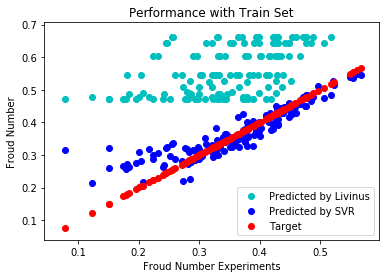

In [15]:
Fr_l=np.power(10,-(0.0000007928*np.power(-np.log10(np.asarray(Dimensionless_Attributes['Buoyancy Reynolds R']/Dimensionless_Attributes['Eotvos Number Eo'])),7.443)+0.3276))
Fr_Livinus=Fr_l*np.asarray(Dimensionless_Attributes['Cos(Angle)']+Dimensionless_Attributes['Sin(Angle)'])

Fr_svr=svr.predict(Dimensionless_Attributes)

plt.scatter(Dimensionless_Labels,Fr_Livinus,c='c')
plt.scatter(Dimensionless_Labels,Fr_svr,c='b')
plt.scatter(Dimensionless_Labels,Dimensionless_Labels,c='r')
plt.xlabel("Froud Number Experiments")
plt.ylabel("Froud Number")
plt.legend(("Predicted by Livinus","Predicted by SVR","Target"),loc='bottom right')
plt.title("Performance with Train Set")

Now, we evaluate the performance using the Test Set.

Text(0.5,1,'Performance with Test Set')

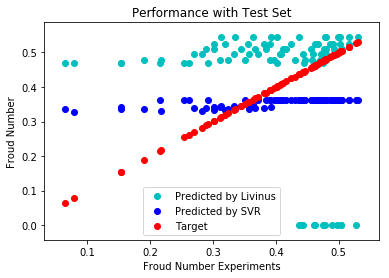

In [16]:
Test_Set=pd.read_excel(r"C:\Users\victo\Test_Set_Drift_Velocity_Analysis.xlsx") #Read an Excel table into a pandas DataFrame
D=np.asarray(Test_Set['Diameter [m]'])
rho_L=np.asarray(Test_Set['rhoL [kg/m3]'])
rho_G=np.asarray(Test_Set['rhoG [kg/m3]'])
cos_a=np.asarray(Test_Set['Cos(Angle)'])
sin_a=np.asarray(Test_Set['Sin(Angle)'])
Fr_real=np.asarray(Test_Set['Froud Number Fr'])
V_d_real=np.asarray(Test_Set['Drift Velocity [m/s]'])
Test_Set=Test_Set.drop(Test_Set.columns[[0,3,4,5,6,7,8,9,10,11,14,15]], axis=1)

Fr_l=np.power(10,-(0.0000007928*np.power(-np.log10(np.asarray(Test_Set['Buoyancy Reynolds R']/Test_Set['Eotvos Number Eo'])),7.443)+0.3276))
Fr_Livinus=Fr_l*np.asarray(Test_Set['Cos(Angle)']+Test_Set['Sin(Angle)'])
Fr_Livinus=np.nan_to_num(Fr_Livinus)


Fr_svr_Test=svr.predict(Test_Set)


plt.scatter(Fr_real,Fr_Livinus,c='c')
plt.scatter(Fr_real,Fr_svr_Test,c='b')
plt.scatter(Fr_real,Fr_real,c='r')
plt.xlabel("Froud Number Experiments")
plt.ylabel("Froud Number")
plt.legend(("Predicted by Livinus","Predicted by SVR","Target"),loc='bottom right')
plt.title("Performance with Test Set")

For Livinus et.al. model, the drift velocity can therefore be calculated from the following equation, using the predicted Froud Number:
v_d=Fr[gD(1-rho_g/rho_l)]^0.5

However, for the model proposed, we used 0.8 as exponent and multiply for (Cos(Theta)+Sin(Theta)).

Text(0.5,1,'Drift Velocity Prediction')

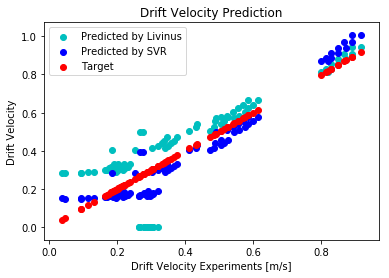

In [17]:
V_d_Livinus=Fr_Livinus*np.power(9.80665*D*(1-rho_G/rho_L),0.5)
V_d_svr=Fr_svr_Test*(cos_a+sin_a)*np.power(9.80665*D*(1-rho_G/rho_L),0.8)

plt.scatter(V_d_real,V_d_Livinus,c='c')
plt.scatter(V_d_real,V_d_svr,c='b')
plt.scatter(V_d_real,V_d_real,c='r')
plt.xlabel("Drift Velocity Experiments [m/s]")
plt.ylabel("Drift Velocity")
plt.legend(("Predicted by Livinus","Predicted by SVR","Target"),loc='bottom right')
plt.title("Drift Velocity Prediction")

According the Froud Number prediction from the Suppor Vector Machine Regressor, we can see that a simplified model, using a constant Froud number can perform a good drift velocity prediction.

Text(0.5,1,'Drift Velocity Prediction')

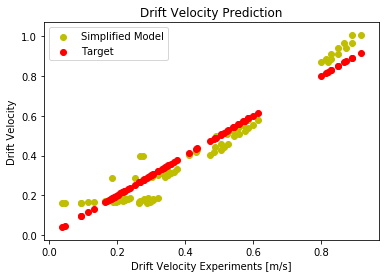

In [18]:
V_d_simplified=0.36219587*(cos_a+sin_a)*np.power(9.80665*D*(1-rho_G/rho_L),0.8)
plt.scatter(V_d_real,V_d_simplified,c='y')
plt.scatter(V_d_real,V_d_real,c='r')
plt.xlabel("Drift Velocity Experiments [m/s]")
plt.ylabel("Drift Velocity")
plt.legend(("Simplified Model","Target"),loc='bottom right')
plt.title("Drift Velocity Prediction")

## 4. References
[1] http://scikit-learn.org/stable/modules/preprocessing.html

[2] http://scikit-learn.org/stable/modules/compose.html#combining-estimators

[3] Livinus, Aniefiok, Patrick Verdin, Liyun Lao, Jan Nossen, Morten Langsholt, and Hans-Gunnar Sleipnaes. "Simplified generalised drift velocity correlation for elongated bubbles in liquid in pipes." Journal of Petroleum Science and Engineering. Vol. 160, 2018: 106-118.
